In [262]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [263]:
#importing datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [264]:
train.shape

(103904, 25)

In [265]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [266]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [268]:
#dropping Unnamed and id
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

In [269]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [270]:
test.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [271]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns=[c.replace(' ', '_') for c in test.columns]

In [272]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [273]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [274]:
train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

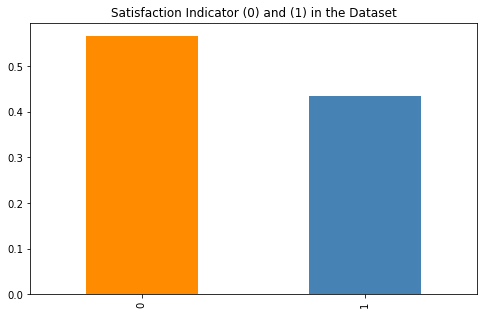

In [275]:
#checking if data is balanced or not
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'])
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

##### The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment.

In [276]:
#Checking for missing values
train.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [277]:
test.isnull().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

In [278]:
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [279]:
test['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [280]:
#categorical columns
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [281]:
# Replace NaN with mode for categorical variables
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [282]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

In [283]:
import seaborn as sns

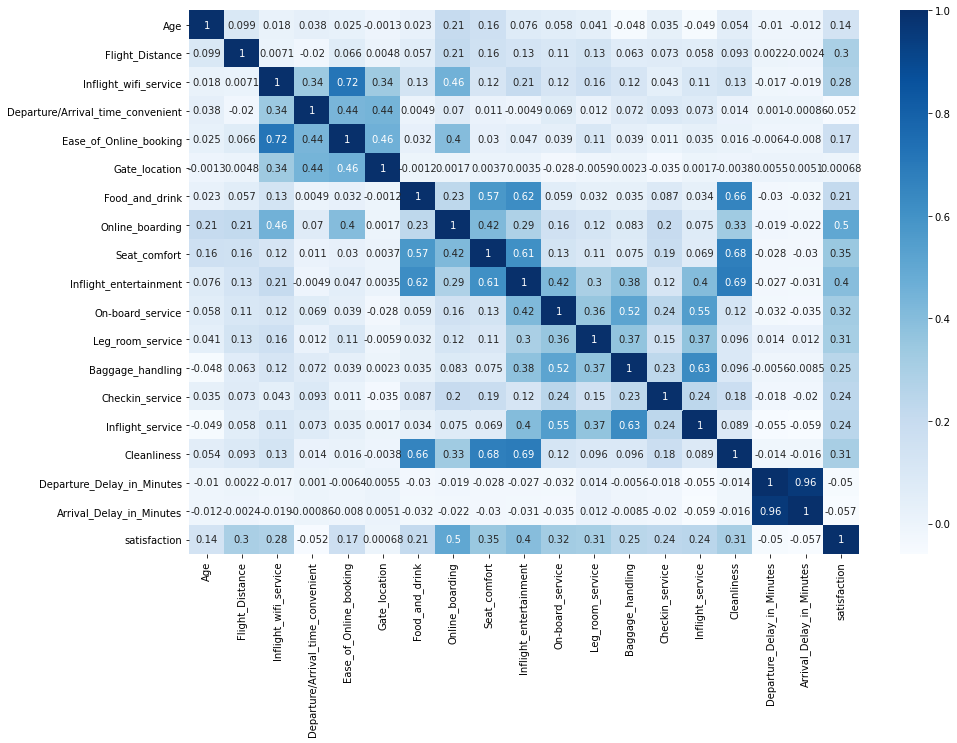

In [284]:
##check correlation
import seaborn as sns
correlation=train.corr()
plt.figure(figsize=(15,10))
colormap=plt.cm.Blues
g=sns.heatmap(train.corr(),annot=True,cmap=colormap)

##### Best features - Online Booking, Class, and Type of Travel
##### Worst features - Gate location, Gender, and Departure/Arrival Time Convenient

<AxesSubplot:>

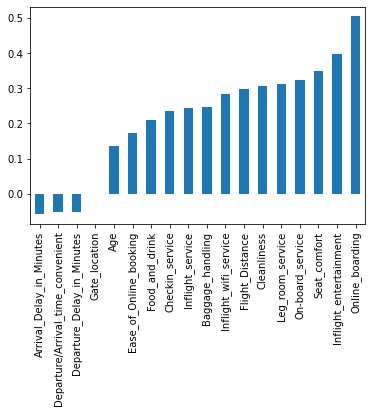

In [285]:
train.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

###### Important continuous factors which contribute more correlation with customer satisfaction are 'Inflight wifi service','Flight Distance','cleanliness','Leg room service','on board service','seat comfort','inflight entertainment','online boarding'

online boarding have maximum correlation with satisfaction

In [286]:
train['Online_boarding'].value_counts()


4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online_boarding, dtype: int64

<AxesSubplot:ylabel='Frequency'>

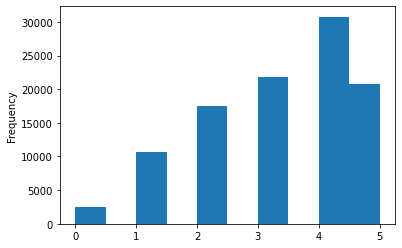

In [287]:
train['Online_boarding'].plot(kind='hist')

C:\Users\surbhi thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surbhi thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


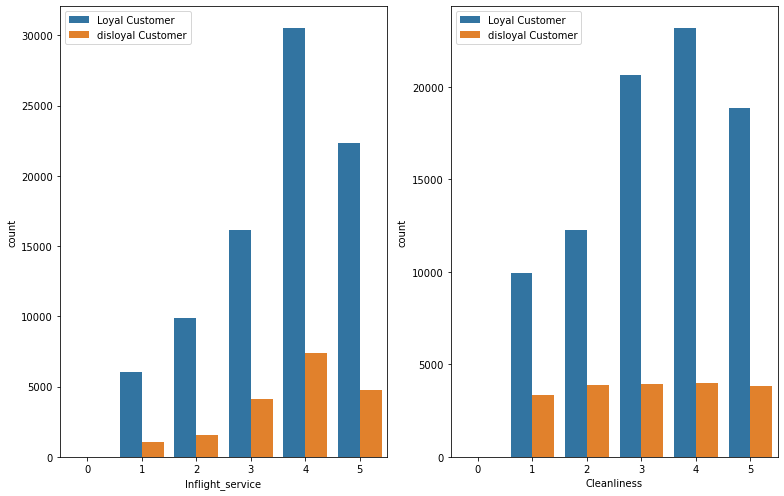

In [288]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.countplot('Inflight_service',data=train,hue='Customer_Type')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
sns.countplot('Cleanliness',data=train,hue='Customer_Type')
plt.legend(loc='upper left')
plt.tight_layout()

C:\Users\surbhi thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surbhi thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


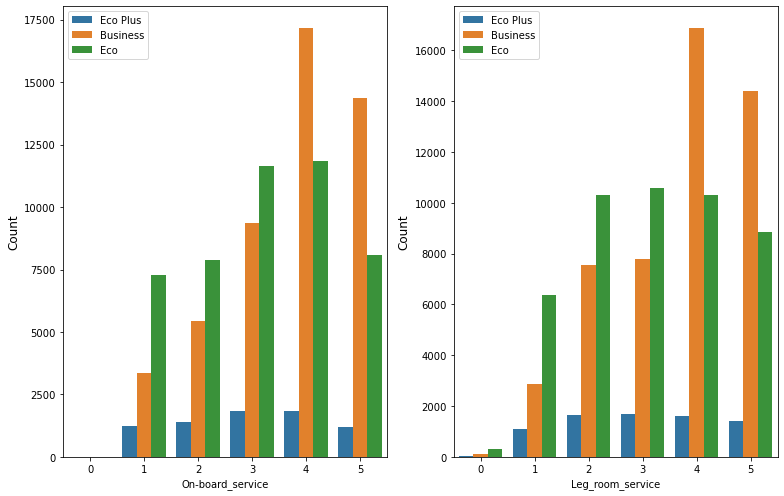

In [289]:
#here we check variation in ratings,prominently people of Business class have given good 
#feedback compared to eco and Eco plus classes.

plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.countplot('On-board_service',data=train,hue='Class')
plt.legend(loc='upper left')
plt.ylabel('Count',fontsize=12)
plt.subplot(1,2,2)
sns.countplot('Leg_room_service',data=train,hue='Class')
plt.legend(loc='upper left')
plt.ylabel('Count',fontsize=12)
plt.tight_layout()

C:\Users\surbhi thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surbhi thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


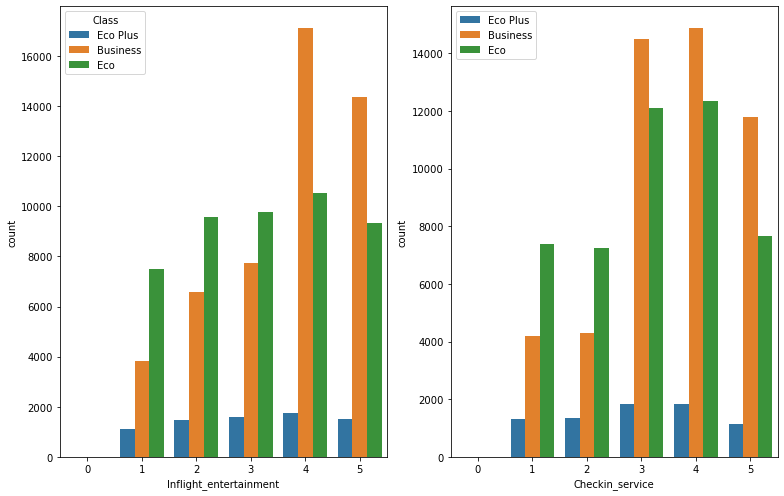

In [290]:
#from here we can infer that mostly Business class people have been priortized followed by Eco class with
#almost same importance.

plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.countplot('Inflight_entertainment',data=train,hue='Class')
plt.subplot(1,2,2)
sns.countplot('Checkin_service',data=train,hue='Class')
plt.legend(loc='upper left')
plt.tight_layout()

In [291]:
#Outlier
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Age                                    24.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                            1.0
dtype: float64


In [292]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(74931, 23)

In [293]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0


In [294]:
test.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [295]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [296]:
#As there were many features and dropped some columns with less correlation values
features = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service', 'Ease_of_Online_booking',
        'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
target = ['satisfaction']


In [297]:
from sklearn.preprocessing import StandardScaler
# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [298]:
X_train['Flight_Distance'] = scaler.fit_transform(np.array(X_train['Flight_Distance']).reshape(-1,1))
X_test['Flight_Distance'] = scaler.transform(np.array(X_test['Flight_Distance']).reshape(-1,1))

X_train['Age'] = scaler.fit_transform(np.array(X_train['Age']).reshape(-1,1))
X_test['Age'] = scaler.transform(np.array(X_test['Age']).reshape(-1,1))

X_train['Departure_Delay_in_Minutes'] = scaler.fit_transform(np.array(X_train['Departure_Delay_in_Minutes']).reshape(-1,1))
X_test['Departure_Delay_in_Minutes'] = scaler.transform(np.array(X_test['Departure_Delay_in_Minutes']).reshape(-1,1))

X_train['Arrival_Delay_in_Minutes'] = scaler.fit_transform(np.array(X_train['Arrival_Delay_in_Minutes']).reshape(-1,1))
X_test['Arrival_Delay_in_Minutes'] = scaler.transform(np.array(X_test['Arrival_Delay_in_Minutes']).reshape(-1,1))


<ipython-input-298-ac87dbe9abcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Flight_Distance'] = scaler.fit_transform(np.array(X_train['Flight_Distance']).reshape(-1,1))
<ipython-input-298-ac87dbe9abcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Flight_Distance'] = scaler.transform(np.array(X_test['Flight_Distance']).reshape(-1,1))
<ipython-input-298-ac87dbe9abcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [299]:
X_train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,Male,Loyal Customer,-1.752774,Personal Travel,Eco Plus,-0.739365,3,3,5,3,5,5,4,3,4,4,5,5,3.195320,2.137778
2,Female,Loyal Customer,-0.891942,Business travel,Business,-0.005505,2,2,5,5,5,5,4,3,4,4,4,5,-0.513856,-0.522369
4,Male,Loyal Customer,1.425680,Business travel,Business,-1.004071,3,3,4,5,5,3,3,4,4,3,3,3,-0.513856,-0.522369
5,Female,Loyal Customer,-0.891942,Personal Travel,Eco,0.035385,3,2,1,2,1,1,3,4,4,4,4,1,-0.513856,-0.522369
6,Male,Loyal Customer,0.498631,Personal Travel,Eco,0.138685,2,2,2,2,2,2,3,3,4,3,5,2,0.821447,2.876707


In [300]:
from sklearn import preprocessing
sexencoder=preprocessing.LabelEncoder()
X_train['Gender']=sexencoder.fit_transform(X_train['Gender'])
X_test['Gender']=sexencoder.transform(X_test['Gender'])

<ipython-input-300-d5c1d36c8ac5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Gender']=sexencoder.fit_transform(X_train['Gender'])
<ipython-input-300-d5c1d36c8ac5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Gender']=sexencoder.transform(X_test['Gender'])


In [301]:
custencoder=preprocessing.LabelEncoder()
X_train['Customer_Type']=custencoder.fit_transform(X_train['Customer_Type'])
X_test['Customer_Type']=custencoder.transform(X_test['Customer_Type'])

<ipython-input-301-ccab3d2fad20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Customer_Type']=custencoder.fit_transform(X_train['Customer_Type'])
<ipython-input-301-ccab3d2fad20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Customer_Type']=custencoder.transform(X_test['Customer_Type'])


In [302]:
travelencoder=preprocessing.LabelEncoder()
X_train['Type_of_Travel']=travelencoder.fit_transform(X_train['Type_of_Travel'])
X_test['Type_of_Travel']=travelencoder.transform(X_test['Type_of_Travel'])

<ipython-input-302-a6df0d46f422>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Type_of_Travel']=travelencoder.fit_transform(X_train['Type_of_Travel'])
<ipython-input-302-a6df0d46f422>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Type_of_Travel']=travelencoder.transform(X_test['Type_of_Travel'])


In [303]:
classencoder=preprocessing.LabelEncoder()
X_train['Class']=classencoder.fit_transform(X_train['Class'])
X_test['Class']=classencoder.transform(X_test['Class'])

<ipython-input-303-686f8d4a96ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Class']=classencoder.fit_transform(X_train['Class'])
<ipython-input-303-686f8d4a96ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Class']=classencoder.transform(X_test['Class'])


In [304]:
X_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,-1.752774,1,2,-0.739365,3,3,5,3,5,5,4,3,4,4,5,5,3.195320,2.137778
2,0,0,-0.891942,0,0,-0.005505,2,2,5,5,5,5,4,3,4,4,4,5,-0.513856,-0.522369
4,1,0,1.425680,0,0,-1.004071,3,3,4,5,5,3,3,4,4,3,3,3,-0.513856,-0.522369
5,0,0,-0.891942,1,1,0.035385,3,2,1,2,1,1,3,4,4,4,4,1,-0.513856,-0.522369
6,1,0,0.498631,1,1,0.138685,2,2,2,2,2,2,3,3,4,3,5,2,0.821447,2.876707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,-1.090596,0,1,-1.027744,2,2,2,2,2,2,3,1,4,2,3,2,-0.068755,-0.522369
103900,1,0,0.631067,0,0,1.291124,4,4,2,4,5,5,5,5,5,5,5,4,-0.513856,-0.522369
103901,1,1,-0.627071,0,0,0.912358,1,1,4,1,5,4,3,2,4,5,5,4,0.524713,1.546634
103902,0,1,-1.156814,0,1,-0.158303,1,1,1,1,1,1,4,5,1,5,4,1,-0.513856,-0.522369


In [305]:
#X_train=pd.concat([X_train,pd.get_dummies(X_train['Customer_Type'], prefix='Customer_Type')],axis=1)
#X_test=pd.concat([X_test,pd.get_dummies(X_test['Customer_Type'], prefix='Customer_Type')],axis=1)

In [306]:
#X_train=pd.concat([X_train,pd.get_dummies(X_train['Type_of_Travel'], prefix='Type_of_Travel')],axis=1)
#X_test=pd.concat([X_test,pd.get_dummies(X_test['Type_of_Travel'], prefix='Type_of_Travel')],axis=1)

In [307]:
X_train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,-1.752774,1,2,-0.739365,3,3,5,3,5,5,4,3,4,4,5,5,3.195320,2.137778
2,0,0,-0.891942,0,0,-0.005505,2,2,5,5,5,5,4,3,4,4,4,5,-0.513856,-0.522369
4,1,0,1.425680,0,0,-1.004071,3,3,4,5,5,3,3,4,4,3,3,3,-0.513856,-0.522369
5,0,0,-0.891942,1,1,0.035385,3,2,1,2,1,1,3,4,4,4,4,1,-0.513856,-0.522369
6,1,0,0.498631,1,1,0.138685,2,2,2,2,2,2,3,3,4,3,5,2,0.821447,2.876707


In [308]:
#X_train.drop(['Customer_Type','Type_of_Travel','Class'],axis=1, inplace=True)



In [309]:
#X_test.drop(['Customer_Type','Type_of_Travel','Class'],axis=1, inplace=True)

In [310]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
ypred=svc.predict(X_test)

C:\Users\surbhi thakur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [311]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8671850939328611

<AxesSubplot:>

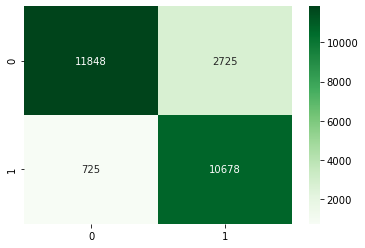

In [312]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred),cmap='Greens',annot=True, fmt='.0f')

In [313]:
from sklearn.ensemble import RandomForestClassifier
Randomforest=RandomForestClassifier(criterion='gini',random_state=10)
Randomforest.fit(X_train,y_train)

<ipython-input-313-3a530102829d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Randomforest.fit(X_train,y_train)


RandomForestClassifier(random_state=10)

In [314]:
ypredd=Randomforest.predict(X_test)

In [315]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredd)

0.9600015398829689

<AxesSubplot:>

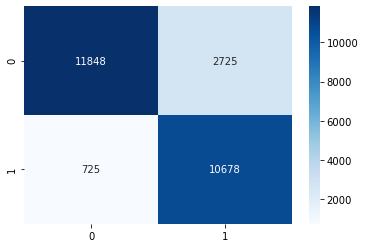

In [316]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred),cmap='Blues',annot=True, fmt='.0f')

In [317]:
import pickle

In [318]:
file=open('Randomforest.pkl','wb')
pickle.dump(Randomforest,file)
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(sexencoder,open('sexencoder.pkl','wb'))
pickle.dump(custencoder,open('custencoder.pkl','wb'))

pickle.dump(travelencoder,open('travelencoder.pkl','wb'))
pickle.dump(classencoder,open('classencoder.pkl','wb'))

file.close()

In [319]:
X_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,-1.752774,1,2,-0.739365,3,3,5,3,5,5,4,3,4,4,5,5,3.195320,2.137778
2,0,0,-0.891942,0,0,-0.005505,2,2,5,5,5,5,4,3,4,4,4,5,-0.513856,-0.522369
4,1,0,1.425680,0,0,-1.004071,3,3,4,5,5,3,3,4,4,3,3,3,-0.513856,-0.522369
5,0,0,-0.891942,1,1,0.035385,3,2,1,2,1,1,3,4,4,4,4,1,-0.513856,-0.522369
6,1,0,0.498631,1,1,0.138685,2,2,2,2,2,2,3,3,4,3,5,2,0.821447,2.876707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,-1.090596,0,1,-1.027744,2,2,2,2,2,2,3,1,4,2,3,2,-0.068755,-0.522369
103900,1,0,0.631067,0,0,1.291124,4,4,2,4,5,5,5,5,5,5,5,4,-0.513856,-0.522369
103901,1,1,-0.627071,0,0,0.912358,1,1,4,1,5,4,3,2,4,5,5,4,0.524713,1.546634
103902,0,1,-1.156814,0,1,-0.158303,1,1,1,1,1,1,4,5,1,5,4,1,-0.513856,-0.522369


In [327]:
sexencoder.transform(np.array('Male').reshape(-1,1))

array([1], dtype=int64)